In [327]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,  Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np# 元となる画像の読み込み
%matplotlib inline

In [944]:
# opencv画像入力用
from IPython.display import display, Image

def display_cv_image(image, format='.JPG'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

def readyForGuess(img_name):
    img = cv2.imread( "./img/"+img_name+".jpg", cv2.IMREAD_GRAYSCALE)
    width = 100
    size = (1*width,1*width)
    #Create Small Size Image
    img = cv2.resize(img, size)
    img_dat = img/255
    img_dat = img_dat.reshape(1,10000)
    return img_dat

In [945]:
# 元となる画像の読み込み
bef_img = cv2.imread( './img/bef.JPG', cv2.IMREAD_GRAYSCALE)
aft_img = cv2.imread('./img/aft.JPG', cv2.IMREAD_GRAYSCALE) 

In [946]:
width = 100
size = (1*width,1*width)
#Create Small Size Image
bef_img = cv2.resize(bef_img, size)
aft_img = cv2.resize(aft_img, size)

In [947]:
bef_dat = bef_img/255
aft_dat = aft_img/255
hoge = bef_dat
bef_dat = bef_dat.reshape(1,10000)
aft_dat = aft_dat.reshape(1,10000)
length=10000

# ニューラルネットを作成

In [948]:
NN = Sequential() #空のニューラルネット
NN.add(Dense(length, input_dim=length))
NN.add(Activation('relu'))
NN.add(Dense(length))
NN.add(Activation('softmax'))
NN.summary()
NN.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 10000)             100010000 
_________________________________________________________________
activation_175 (Activation)  (None, 10000)             0         
_________________________________________________________________
dense_182 (Dense)            (None, 10000)             100010000 
_________________________________________________________________
activation_176 (Activation)  (None, 10000)             0         
Total params: 200,020,000
Trainable params: 200,020,000
Non-trainable params: 0
_________________________________________________________________


In [949]:
print("***")
print(bef_dat)
print("***")
print(aft_dat)
print(hoge.shape)

***
[[ 0.  0.  0. ...,  0.  0.  0.]]
***
[[ 0.  0.  0. ...,  0.  0.  0.]]
(100, 100)


In [950]:
NN.fit(aft_dat,bef_dat, epochs=100)

Epoch 1/100
1/1 [==============================] - 18s - loss: 56556.7188 - acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 7s - loss: 73164.2734 - acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 6s - loss: 73141.5625 - acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 4s - loss: 70101.2422 - acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 4s - loss: 68687.7500 - acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 3s - loss: 66891.3594 - acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 3s - loss: 58891.9961 - acc: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 2s - loss: 55462.3281 - acc: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 3s - loss: 55668.3438 - acc: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 3s - loss: 55803.7734 - acc: 0.0000e+00
Epoch 11/100
1/1 [==============================] - 2s - loss: 55819.9102 - acc: 0.0000e

1/1 [==============================] - 4s - loss: 54221.9570 - acc: 0.0000e+00
Epoch 91/100
1/1 [==============================] - 5s - loss: 54221.7812 - acc: 0.0000e+00
Epoch 92/100
1/1 [==============================] - 3s - loss: 54221.6602 - acc: 0.0000e+00
Epoch 93/100
1/1 [==============================] - 3s - loss: 54221.4922 - acc: 0.0000e+00
Epoch 94/100
1/1 [==============================] - 3s - loss: 54221.4297 - acc: 0.0000e+00
Epoch 95/100
1/1 [==============================] - 2s - loss: 54221.3203 - acc: 0.0000e+00
Epoch 96/100
1/1 [==============================] - 3s - loss: 54221.1914 - acc: 0.0000e+00
Epoch 97/100
1/1 [==============================] - 4s - loss: 54221.1172 - acc: 0.0000e+00
Epoch 98/100
1/1 [==============================] - 3s - loss: 54221.0352 - acc: 0.0000e+00
Epoch 99/100
1/1 [==============================] - 5s - loss: 54220.9688 - acc: 0.0000e+00
Epoch 100/100
1/1 [==============================] - 3s - loss: 54220.8945 - acc: 0.0000e+00


# 予想したいデータの入力

In [954]:
img_name = "aft" #ファイル名のみ
guess_dat = readyForGuess(img_name)
result = NN.predict(guess_dat)

In [955]:
#正規化準備
result_max = result.max()
result_min = result.min()
# 0-255に正規化
result = (result - result_min) * (255 - 0) / (result_max - result_min) + 0

#intに変換する.グレースケールはintだから
result = np.floor(result)
result = result.astype(np.int)
result = result.reshape(width,-1)

推測画像


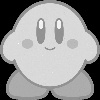

In [956]:
cv2.imwrite("./img/output.jpg", result)
# 元となる画像の読み込み
img = cv2.imread("./img/output.jpg")
print("推測画像")
display_cv_image(img)

これから


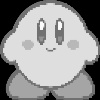

これを推測


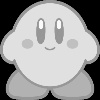

In [890]:
print("これから")
display_cv_image(aft_img)
print("これを推測")
display_cv_image(bef_img)
